### Import Required Libraries
We import necessary Python libraries for file operations, image processing, and visualization.

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

### Count Images in Each Directory
This function counts the number of images in `train`, `val`, and `test` splits for both 'Accident' and 'Non Accident' categories.

In [2]:
DATASET_PATH = 'E:\\AI\\crash detection\\data'

### Bar Plot of Image Distribution
We visualize the number of images for each category across all dataset splits.

In [3]:
def count_images(dataset_path):
    data_stats = {'set': [], 'label': [], 'count': []}
    for split in ['train', 'val', 'test']:
        for label in ['Accident', 'Non Accident']:
            dir_path = os.path.join(dataset_path, split, label)
            count = len([f for f in os.listdir(dir_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            data_stats['set'].append(split)
            data_stats['label'].append(label)
            data_stats['count'].append(count)
    return data_stats


stats = count_images(DATASET_PATH)

print(stats)

{'set': ['train', 'train', 'val', 'val', 'test', 'test'], 'label': ['Accident', 'Non Accident', 'Accident', 'Non Accident', 'Accident', 'Non Accident'], 'count': [369, 422, 46, 52, 47, 53]}


### Pie Chart of Overall Class Distribution
This pie chart gives us a quick overview of the total class balance in the dataset.

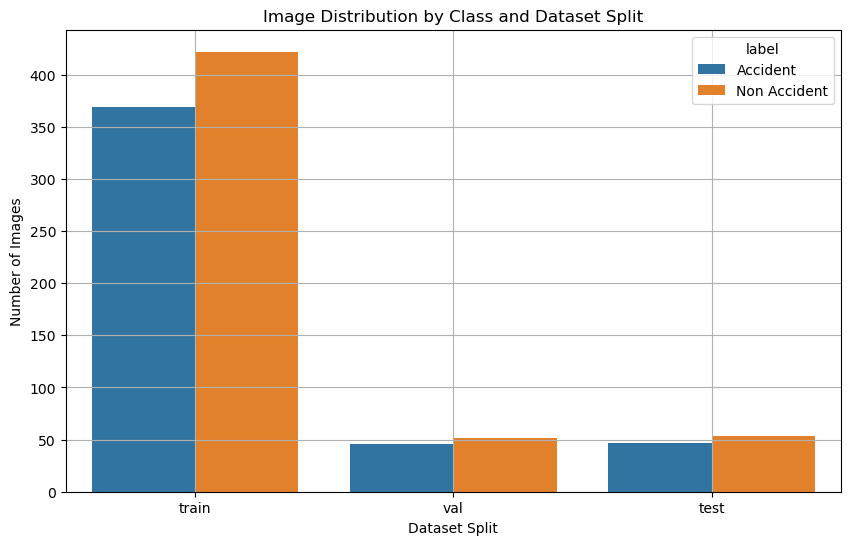

In [4]:
import pandas as pd
df_stats = pd.DataFrame(stats)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_stats, x='set', y='count', hue='label')
plt.title('Image Distribution by Class and Dataset Split')
plt.ylabel('Number of Images')
plt.xlabel('Dataset Split')
plt.grid(True)
plt.show()

### Image Dimension Distribution
We analyze the distribution of image widths and heights to check for consistency.

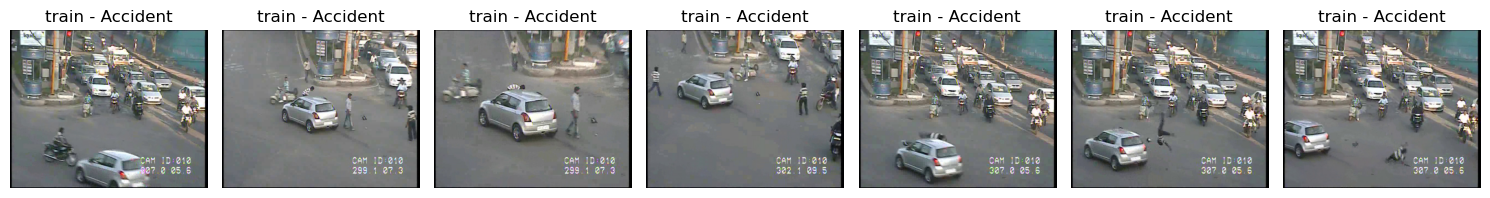

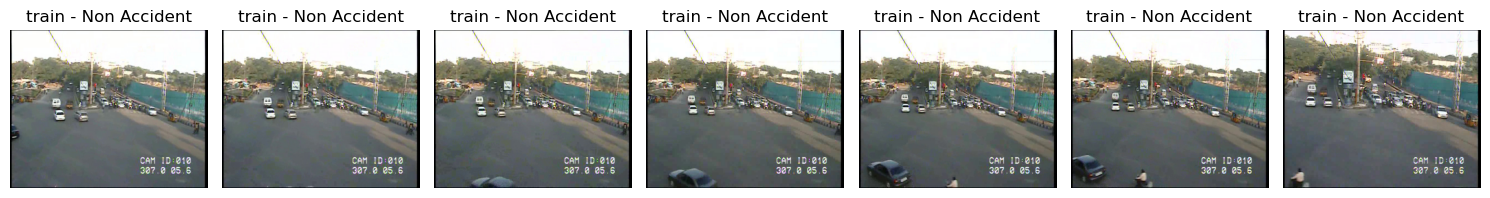

In [11]:
def show_sample_images(dataset_path, split='train', label='Accident', n=5):
    dir_path = os.path.join(dataset_path, split, label)
    image_files = [f for f in os.listdir(dir_path) if f.endswith(('.jpg', '.png', '.jpeg'))][:n]

    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(dir_path, img_file)
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{split} - {label}")
    plt.tight_layout()
    plt.show()


show_sample_images(DATASET_PATH, 'train', 'Accident', n=7)


show_sample_images(DATASET_PATH, 'train', 'Non Accident', n=7)


### Aspect Ratio Distribution
This shows the ratio of width to height for images, helping identify resizing needs.

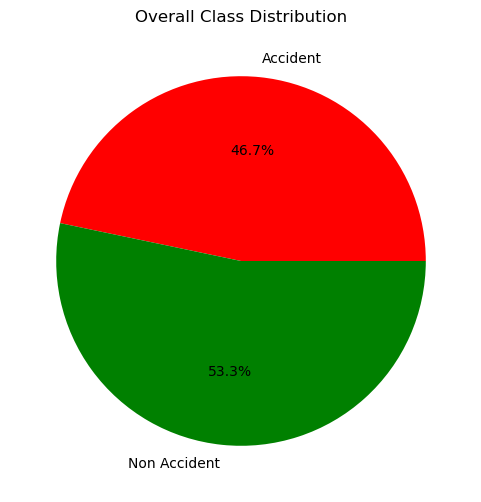

In [6]:
# Pie chart for total images by label
total_df = df_stats.groupby('label')['count'].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(total_df['count'], labels=total_df['label'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Overall Class Distribution')
plt.show()

### Brightness Distribution
We compute grayscale brightness to understand lighting conditions across the dataset.

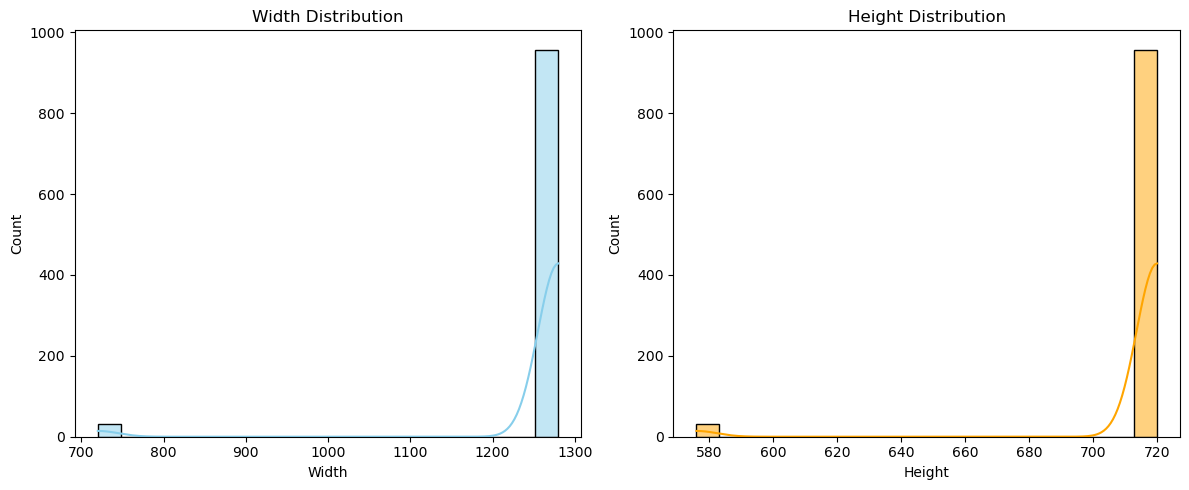

In [7]:
from collections import Counter

def get_image_sizes(dataset_path):
    sizes = []
    for split in ['train', 'val', 'test']:
        for label in ['Accident', 'Non Accident']:
            dir_path = os.path.join(dataset_path, split, label)
            for img_file in os.listdir(dir_path):
                if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                    img_path = os.path.join(dir_path, img_file)
                    try:
                        with Image.open(img_path) as img:
                            sizes.append(img.size)  # (width, height)
                    except:
                        pass
    return sizes

sizes = get_image_sizes(DATASET_PATH)
widths, heights = zip(*sizes)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, kde=True, color='skyblue')
plt.title('Width Distribution')
plt.xlabel('Width')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, kde=True, color='orange')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.tight_layout()
plt.show()

### RGB Mean Values
We calculate mean values for each RGB channel to analyze color balance.

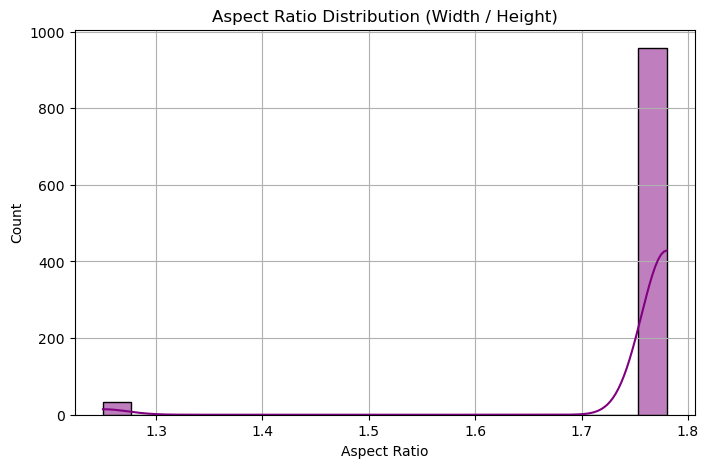

In [8]:
aspect_ratios = [round(w / h, 2) for w, h in sizes if h != 0]

plt.figure(figsize=(8, 5))
sns.histplot(aspect_ratios, bins=20, kde=True, color='purple')
plt.title('Aspect Ratio Distribution (Width / Height)')
plt.xlabel('Aspect Ratio')
plt.grid(True)
plt.show()

### Show Sample Accident Images
Displays a few sample images from the 'Accident' category to visually verify contents.

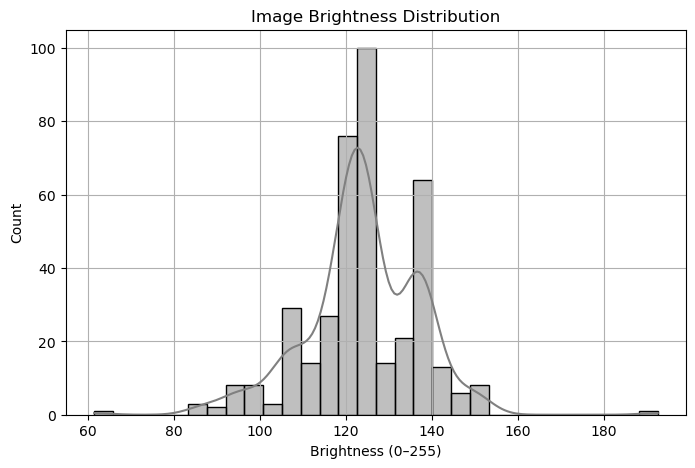

In [9]:
def calculate_brightness(img_path):
    try:
        with Image.open(img_path) as img:
            img = img.convert('L')  # Convert to grayscale
            stat = img.histogram()
            pixels = sum(stat)
            brightness = scale = len(stat)
            return sum(i * stat[i] for i in range(scale)) / pixels
    except:
        return None

brightness_values = []
for split in ['train', 'val', 'test']:
    for label in ['Accident', 'Non Accident']:
        dir_path = os.path.join(DATASET_PATH, split, label)
        for img_file in os.listdir(dir_path)[:100]:  # Limit for speed
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(dir_path, img_file)
                b = calculate_brightness(img_path)
                if b is not None:
                    brightness_values.append(b)

plt.figure(figsize=(8, 5))
sns.histplot(brightness_values, bins=30, kde=True, color='gray')
plt.title('Image Brightness Distribution')
plt.xlabel('Brightness (0–255)')
plt.grid(True)
plt.show()


### Show Sample Non-Accident Images
Displays a few sample images from the 'Non Accident' category for comparison.

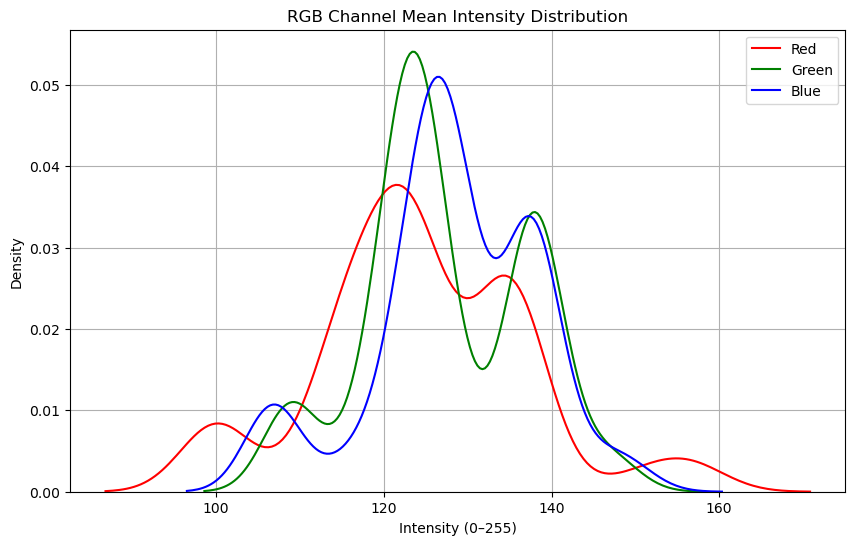

In [10]:
import numpy as np

def get_rgb_means(img_path):
    try:
        with Image.open(img_path) as img:
            img = img.convert('RGB')
            arr = np.array(img)
            r = np.mean(arr[:, :, 0])
            g = np.mean(arr[:, :, 1])
            b = np.mean(arr[:, :, 2])
            return r, g, b
    except:
        return None

r_vals, g_vals, b_vals = [], [], []
for split in ['train']:
    for label in ['Accident', 'Non Accident']:
        dir_path = os.path.join(DATASET_PATH, split, label)
        for img_file in os.listdir(dir_path)[:100]:  # Limit for speed
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(dir_path, img_file)
                rgb = get_rgb_means(img_path)
                if rgb:
                    r_vals.append(rgb[0])
                    g_vals.append(rgb[1])
                    b_vals.append(rgb[2])

plt.figure(figsize=(10, 6))
sns.kdeplot(r_vals, color='red', label='Red')
sns.kdeplot(g_vals, color='green', label='Green')
sns.kdeplot(b_vals, color='blue', label='Blue')
plt.title('RGB Channel Mean Intensity Distribution')
plt.xlabel('Intensity (0–255)')
plt.legend()
plt.grid(True)
plt.show()